### Do refer to the original notebook for a different interesting implementation

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.config.list_physical_devices()
# tf.config.list_logical_devices()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
data = keras.datasets.mnist.load_data()

In [4]:
type(data[0][0]) # tuple
len(data) # 2
len(data[0]) # 2
len(data[0][0]) # 60000
type(data[0][0]) # numpy.ndarray()
data[0][0].shape # (60000, 28, 28)
(x_train, y_train), (x_test, y_test) = data

In [5]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape


(10000,)

In [6]:
list(y_train[:5])

[5, 0, 4, 1, 9]

In [7]:
encoding_layer = tf.keras.layers.experimental.preprocessing.CategoryEncoding(num_tokens=10, output_mode='binary')
y_train_enc = encoding_layer(list(y_train))
y_test_enc = encoding_layer(list(y_test))
# encoding_layer([3,2,1,0])


In [8]:
# normalize
x_train = x_train/255.
x_test = x_test/255.

In [9]:
# simplistic models can have high Dropout(0.5). 
# Since this model is a more sophisticated version, reduced dropout to 0.25 to reduce bias.
dr = 0.25
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(dr),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(dr),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(dr),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(dr),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(dr),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(dr),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(dr),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(dr),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [10]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

### Use -
* bin cross ent -> single/two classes</br>
* cat. CE -> multiple classes
* sparse cat. CE -> a convenience function with added functionality over cat. CE where you only specify the integer index of the class 

### sparse_categorical_crossentropy and CategoricalAccuracy to be used with y_train only as shown below

In [11]:
if 0:
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy'#, metrics=['accuracy'] )
              , metrics=[tf.keras.metrics.CategoricalAccuracy() ] )
    model.fit(x_train, y_train, batch_size=32, epochs=5)

In [12]:
model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'] )
#               , metrics=[tf.keras.metrics.CategoricalAccuracy() ] )
#                          , tf.keras.metrics.AUC() \
#                          , tf.keras.metrics.Precision(), tf.keras.metrics.Recall() ] )
#                          , tf.keras.metrics.RecallAtPrecision() \
#                         , tf.keras.metrics.PrecisionAtRecall()])

In [13]:
!pip install pydot

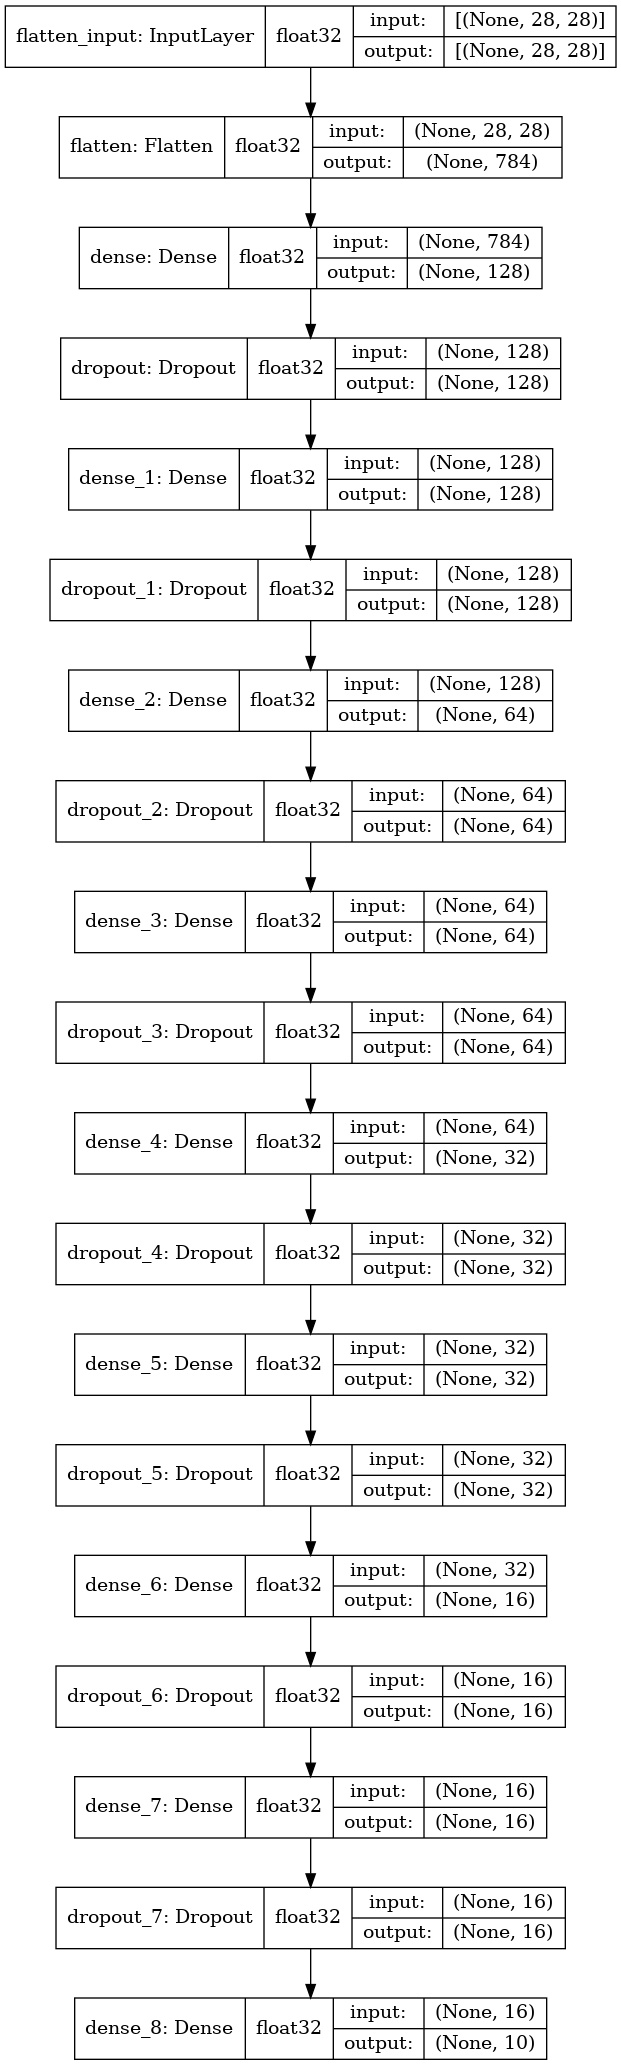

In [14]:
keras.utils.plot_model(model, to_file='dumped_models/model.png', show_shapes=True, show_dtype=True,)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

In [16]:
y_train[0]
type(y_train_enc.numpy())
type(x_train)
0.95**50

tf.math.exp(-0.1)
0.9**10
0.9**25
!pwd

/home/aman/Desktop/projects/repos/tutorials/tf_docs/site/en/tutorials/quickstart


In [ ]:
chkpt_callback = tf.keras.callbacks.ModelCheckpoint("dumped_models/mnist_{epoch:04d}_{val_accuracy:.4f}_{val_loss:.2f}.hdf5")

# progbarlogger
progbar_callback = tf.keras.callbacks.ProgbarLogger(count_mode='steps')

# CSVLogger
csv_callback = tf.keras.callbacks.CSVLogger('dumped_models/training.log')

# earlystopping
earlystopping_callback = tf.keras.callbacks.EarlyStopping(patience=20)

# LR scheduler
def custom_scheduler_func(epoch, lr):
    if epoch > 0 and epoch%10 == 0:
        return lr*0.9
    return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(custom_scheduler_func, verbose=1)

# tensorboard
tb_callback = tf.keras.callbacks.TensorBoard('dumped_models/logs', update_freq=250)

# RemoteMonitor
remote_monitor_callback = tf.keras.callbacks.RemoteMonitor()

# Reduce on plateau
reduce_plateau_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10
                                                              , verbose=1)

callbacks = [chkpt_callback, earlystopping_callback, lr_callback, tb_callback, progbar_callback, csv_callback
             , remote_monitor_callback, reduce_plateau_callback ]


In [ ]:
%%time
history = model.fit(x_train, y_train_enc.numpy(), batch_size=32, epochs=50, verbose=2, validation_split=0.2
                    , callbacks=callbacks)

In [ ]:
model.save('dumped_models/tmp_mnist_model')

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
model.evaluate(x_test[:1], y_test[:1])

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_test[:10]

In [ ]:
import numpy as np
class_idx = np.argmax( y_pred[:10], axis=1)
class_idx